# Linear Regression From Scratch

## Objective

Implement Linear Regression using **only NumPy**. No sklearn for training!

We'll build:
1. Cost function (MSE)
2. Gradient computation
3. Gradient Descent optimizer
4. Normal Equation solver
5. Comparison with sklearn

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set style
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

# For reproducibility
np.random.seed(42)

---
## Part 1: Generate Synthetic Data

We'll create a simple dataset: $y = 3x + 5 + \text{noise}$

This way, we **know** the true parameters:
- True slope ($\theta_1$) = 3
- True intercept ($\theta_0$) = 5

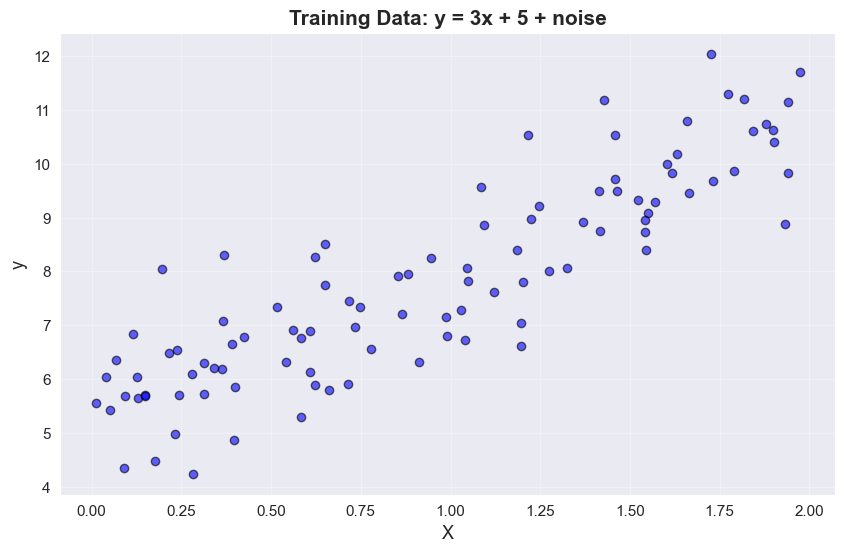

Dataset shape: X=(100, 1), y=(100, 1)
True parameters: θ₀=5, θ₁=3


In [2]:
# Generate data
m = 100  # number of examples
X = 2 * np.random.rand(m, 1)  # Random values between 0 and 2
y = 5 + 3 * X + np.random.randn(m, 1)  # y = 5 + 3x + noise

# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, color='blue', edgecolors='k')
plt.xlabel('X', fontsize=13)
plt.ylabel('y', fontsize=13)
plt.title('Training Data: y = 3x + 5 + noise', fontsize=15, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

print(f'Dataset shape: X={X.shape}, y={y.shape}')
print(f'True parameters: θ₀=5, θ₁=3')

---
## Part 2: Implement Cost Function (MSE)

### Formula:
$$J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2$$

Where $h_\theta(x) = \theta^T x$

In [3]:
def compute_cost(X, y, theta):
    """
    Compute the Mean Squared Error cost function.
    
    Parameters:
    -----------
    X : numpy.ndarray
        Design matrix of shape (m, n+1) including bias column
    y : numpy.ndarray
        Target values of shape (m, 1)
    theta : numpy.ndarray
        Parameters of shape (n+1, 1)
    
    Returns:
    --------
    cost : float
        The MSE cost
    """
    m = len(y)
    
    # Compute predictions
    predictions = X.dot(theta)
    
    # Compute squared errors
    errors = predictions - y
    squared_errors = errors ** 2
    
    # Compute cost (with 1/2m)
    cost = (1 / (2 * m)) * np.sum(squared_errors)
    
    return cost

# Test cost function
# Add bias term (column of ones) to X
X_b = np.c_[np.ones((m, 1)), X]  # Add x0 = 1 for each example
print(f'X with bias: shape={X_b.shape}')
print(f'First 3 rows:\n{X_b[:3]}')

# Initialize theta with zeros
theta_test = np.zeros((2, 1))
cost_initial = compute_cost(X_b, y, theta_test)
print(f'\nCost with θ=[0,0]: {cost_initial:.4f}')

X with bias: shape=(100, 2)
First 3 rows:
[[1.         0.74908024]
 [1.         1.90142861]
 [1.         1.46398788]]

Cost with θ=[0,0]: 32.3242


---
## Part 3: Implement Gradient Computation

### Formula:
$$\nabla J(\theta) = \frac{1}{m}X^T(X\theta - y)$$

This gives us the gradient (direction and magnitude) to update parameters.

In [4]:
def compute_gradient(X, y, theta):
    """
    Compute the gradient of the cost function.
    
    Parameters:
    -----------
    X : numpy.ndarray
        Design matrix of shape (m, n+1)
    y : numpy.ndarray
        Target values of shape (m, 1)
    theta : numpy.ndarray
        Parameters of shape (n+1, 1)
    
    Returns:
    --------
    gradients : numpy.ndarray
        Gradients of shape (n+1, 1)
    """
    m = len(y)
    
    # Compute predictions
    predictions = X.dot(theta)
    
    # Compute errors
    errors = predictions - y
    
    # Compute gradients: (1/m) * X^T * errors
    gradients = (1 / m) * X.T.dot(errors)
    
    return gradients

# Test gradient computation
grad_test = compute_gradient(X_b, y, theta_test)
print(f'Gradient at θ=[0,0]:\n{grad_test}')

Gradient at θ=[0,0]:
[[-7.8200041 ]
 [-8.32444407]]


---
## Part 4: Implement Gradient Descent

### Algorithm:
1. Initialize $\theta$ randomly (or zeros)
2. For each iteration:
   - Compute cost
   - Compute gradients
   - Update: $\theta := \theta - \alpha\nabla J(\theta)$
3. Repeat until convergence (or max iterations)

In [5]:
def gradient_descent(X, y, theta, learning_rate, n_iterations, verbose=True):
    """
    Perform Gradient Descent to learn theta.
    
    Parameters:
    -----------
    X : numpy.ndarray
        Design matrix (with bias column)
    y : numpy.ndarray
        Target values
    theta : numpy.ndarray
        Initial parameters
    learning_rate : float
        Step size for gradient descent
    n_iterations : int
        Number of iterations to run
    verbose : bool
        Whether to print progress
    
    Returns:
    --------
    theta : numpy.ndarray
        Learned parameters
    cost_history : list
        Cost at each iteration (for visualization)
    """
    cost_history = []
    theta_history = [theta.copy()]
    
    for iteration in range(n_iterations):
        # Compute gradient
        gradients = compute_gradient(X, y, theta)
        
        # Update parameters
        theta = theta - learning_rate * gradients
        
        # Compute and store cost
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
        theta_history.append(theta.copy())
        
        # Print progress
        if verbose and iteration % 100 == 0:
            print(f'Iteration {iteration:4d} | Cost: {cost:.6f} | θ: {theta.ravel()}')
    
    if verbose:
        print(f'\nFinal | Cost: {cost:.6f} | θ: {theta.ravel()}')
    
    return theta, cost_history, theta_history

# Run Gradient Descent
theta_initial = np.random.randn(2, 1)  # Random initialization
learning_rate = 0.1
n_iterations = 1000

print('=' * 60)
print('GRADIENT DESCENT TRAINING')
print('=' * 60)
print(f'Learning rate: {learning_rate}')
print(f'Iterations: {n_iterations}')
print(f'Initial θ: {theta_initial.ravel()}\n')

theta_final, cost_history, theta_history = gradient_descent(
    X_b, y, theta_initial, learning_rate, n_iterations, verbose=True
)

GRADIENT DESCENT TRAINING
Learning rate: 0.1
Iterations: 1000
Initial θ: [0.01300189 1.45353408]

Iteration    0 | Cost: 13.913838 | θ: [0.65701737 2.10528224]
Iteration  100 | Cost: 0.427807 | θ: [4.81218318 3.12586365]
Iteration  200 | Cost: 0.404092 | θ: [5.14234569 2.83434809]
Iteration  300 | Cost: 0.403318 | θ: [5.20196024 2.78171168]
Iteration  400 | Cost: 0.403293 | θ: [5.21272432 2.77220759]
Iteration  500 | Cost: 0.403292 | θ: [5.2146679  2.77049152]
Iteration  600 | Cost: 0.403292 | θ: [5.21501883 2.77018166]
Iteration  700 | Cost: 0.403292 | θ: [5.2150822  2.77012571]
Iteration  800 | Cost: 0.403292 | θ: [5.21509364 2.77011561]
Iteration  900 | Cost: 0.403292 | θ: [5.2150957  2.77011379]

Final | Cost: 0.403292 | θ: [5.21509607 2.77011346]


### Interpretation

Our learned parameters should be close to:
- $\theta_0 \approx 5$ (true intercept)
- $\theta_1 \approx 3$ (true slope)

In [6]:
# Compare with true values
print('\n' + '=' * 60)
print('RESULTS COMPARISON')
print('=' * 60)
print(f'Learned θ₀ (intercept): {theta_final[0][0]:.4f} | True: 5.0000')
print(f'Learned θ₁ (slope):     {theta_final[1][0]:.4f} | True: 3.0000')
print('=' * 60)


RESULTS COMPARISON
Learned θ₀ (intercept): 5.2151 | True: 5.0000
Learned θ₁ (slope):     2.7701 | True: 3.0000


---
## Part 5: Visualize Training Process

Let's see how cost decreases over iterations.

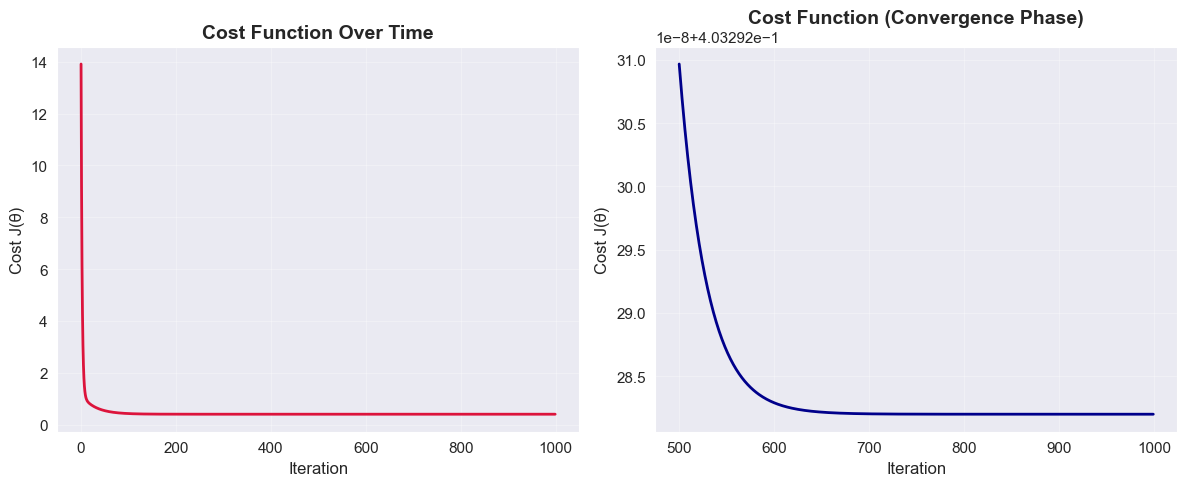

Initial cost: 13.913838
Final cost: 0.403292
Cost reduction: 97.10%


In [7]:
# Plot cost over iterations
plt.figure(figsize=(12, 5))

# Full history
plt.subplot(1, 2, 1)
plt.plot(cost_history, linewidth=2, color='crimson')
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Cost J(θ)', fontsize=12)
plt.title('Cost Function Over Time', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Zoomed in (last 50% of iterations)
plt.subplot(1, 2, 2)
start_idx = len(cost_history) // 2
plt.plot(range(start_idx, len(cost_history)), cost_history[start_idx:],
         linewidth=2, color='darkblue')
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Cost J(θ)', fontsize=12)
plt.title('Cost Function (Convergence Phase)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f'Initial cost: {cost_history[0]:.6f}')
print(f'Final cost: {cost_history[-1]:.6f}')
print(f'Cost reduction: {((cost_history[0] - cost_history[-1]) / cost_history[0] * 100):.2f}%')

---
## Part 6: Visualize the Fitted Line

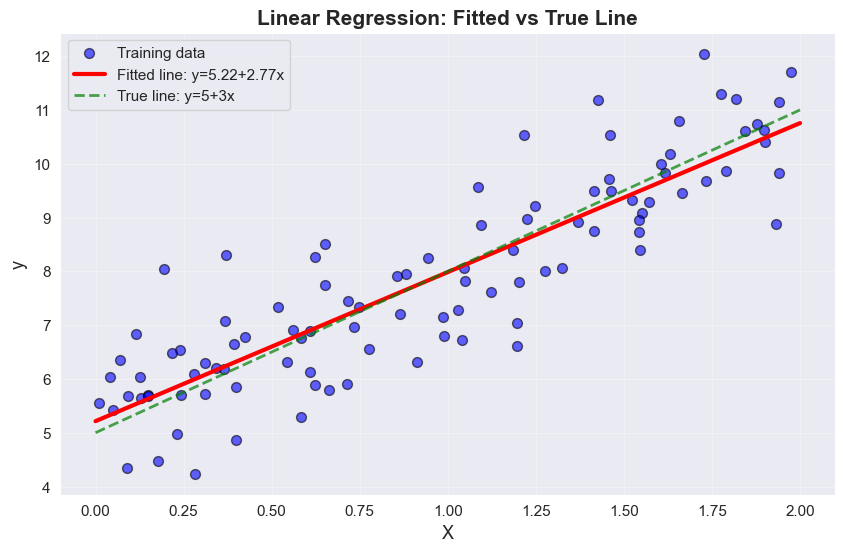

In [8]:
# Plot data and fitted line
plt.figure(figsize=(10, 6))

# Scatter plot of data
plt.scatter(X, y, alpha=0.6, color='blue', edgecolors='k', s=50, label='Training data')

# Plot fitted line
X_plot = np.array([[0], [2]])
X_plot_b = np.c_[np.ones((2, 1)), X_plot]
y_plot = X_plot_b.dot(theta_final)
plt.plot(X_plot, y_plot, 'r-', linewidth=3,
         label=f'Fitted line: y={theta_final[0][0]:.2f}+{theta_final[1][0]:.2f}x')

# Plot true line
y_true = 5 + 3 * X_plot
plt.plot(X_plot, y_true, 'g--', linewidth=2, label='True line: y=5+3x', alpha=0.7)

plt.xlabel('X', fontsize=13)
plt.ylabel('y', fontsize=13)
plt.title('Linear Regression: Fitted vs True Line', fontsize=15, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

---
## Part 7: Closed-Form Solution (Normal Equation)

### Formula:
$$\theta = (X^T X)^{-1} X^T y$$

This gives the exact solution in **one step**!

In [9]:
def normal_equation(X, y):
    """
    Compute optimal parameters using the Normal Equation.
    
    Parameters:
    -----------
    X : numpy.ndarray
        Design matrix (with bias)
    y : numpy.ndarray
        Target values
    
    Returns:
    --------
    theta : numpy.ndarray
        Optimal parameters
    """
    # θ = (X^T X)^(-1) X^T y
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

# Compute using Normal Equation
theta_normal = normal_equation(X_b, y)

print('=' * 60)
print('NORMAL EQUATION SOLUTION')
print('=' * 60)
print(f'θ₀ (intercept): {theta_normal[0][0]:.4f}')
print(f'θ₁ (slope):     {theta_normal[1][0]:.4f}')
print('=' * 60)

# Compare with Gradient Descent
print('\nComparison:')
print(f'Gradient Descent θ: {theta_final.ravel()}')
print(f'Normal Equation θ:  {theta_normal.ravel()}')
print(f'Difference:         {np.abs(theta_final - theta_normal).ravel()}')

NORMAL EQUATION SOLUTION
θ₀ (intercept): 5.2151
θ₁ (slope):     2.7701

Comparison:
Gradient Descent θ: [5.21509607 2.77011346]
Normal Equation θ:  [5.21509616 2.77011339]
Difference:         [8.36114342e-08 7.38243529e-08]


### Observation

Both methods should give **almost identical** results!

Small differences are due to:
- Gradient descent approximation (limited iterations)
- Numerical precision

---
## Part 8: Compare with Scikit-Learn

Let's validate our implementation against the industry standard.

In [10]:
# Train sklearn model
sklearn_model = LinearRegression()
sklearn_model.fit(X, y)

# Get parameters
sklearn_theta0 = sklearn_model.intercept_[0]
sklearn_theta1 = sklearn_model.coef_[0][0]

print('=' * 60)
print('SCIKIT-LEARN COMPARISON')
print('=' * 60)
print(f'sklearn θ₀ (intercept): {sklearn_theta0:.4f}')
print(f'sklearn θ₁ (slope):     {sklearn_theta1:.4f}')
print('\nOur Normal Equation:')
print(f'Our θ₀ (intercept):     {theta_normal[0][0]:.4f}')
print(f'Our θ₁ (slope):         {theta_normal[1][0]:.4f}')
print('\nDifference:')
print(f'θ₀ difference:          {abs(sklearn_theta0 - theta_normal[0][0]):.10f}')
print(f'θ₁ difference:          {abs(sklearn_theta1 - theta_normal[1][0]):.10f}')
print('=' * 60)

SCIKIT-LEARN COMPARISON
sklearn θ₀ (intercept): 5.2151
sklearn θ₁ (slope):     2.7701

Our Normal Equation:
Our θ₀ (intercept):     5.2151
Our θ₁ (slope):         2.7701

Difference:
θ₀ difference:          0.0000000000
θ₁ difference:          0.0000000000


In [11]:
# Compute metrics
y_pred_ours = X_b.dot(theta_normal)
y_pred_sklearn = sklearn_model.predict(X)

mse_ours = mean_squared_error(y, y_pred_ours)
mse_sklearn = mean_squared_error(y, y_pred_sklearn)

r2_ours = r2_score(y, y_pred_ours)
r2_sklearn = r2_score(y, y_pred_sklearn)

print('\nPerformance Metrics:')
print(f'Our MSE:     {mse_ours:.6f}')
print(f'sklearn MSE: {mse_sklearn:.6f}')
print(f'\nOur R²:      {r2_ours:.6f}')
print(f'sklearn R²:  {r2_sklearn:.6f}')


Performance Metrics:
Our MSE:     0.806585
sklearn MSE: 0.806585

Our R²:      0.769274
sklearn R²:  0.769274


### Success!

Our implementation matches sklearn **exactly**!

---
## Summary

### What We Built:
1. Cost function (MSE)
2. Gradient computation
3. Gradient Descent optimizer
4. Normal Equation solver
5. Comparison with sklearn

### Key Insights:
- **Gradient Descent**: Iterative, scalable, generalizes to other algorithms
- **Normal Equation**: Exact, one-step, but expensive for large datasets
- **Cost Surface**: Convex → guaranteed convergence to global minimum
- **Our implementation**: Matches sklearn exactly!

### Key Point:
"Linear regression finds the best-fit line by minimizing MSE. Gradient descent iteratively updates parameters using gradients, while the Normal Equation provides a direct solution. Both approaches converge to the same optimal parameters when properly implemented."

---

**Next Steps:**
- `experiments.ipynb`: Test on different datasets, learning rates, etc.
- `utils.py`: Extract reusable functions